In [56]:
import os
import anndata as ad
import scanpy as sc
import squidpy as sq

DLPFC_SOURCE_DATA_DIR = os.path.join('Data', '1.DLPFC')
DLPFC_PREPROCESSED_DATA_DIR = os.path.join('Data_preprocessed', 'SpatialLIBD')
DLPFC_PREPROCESSED_HDF5_DIR = os.path.join(DLPFC_PREPROCESSED_DATA_DIR, 'h5ad')
DLPFC_ANNDATA_DIR = os.path.join('annData', '1.DLPFC')

ANNDATA_DIR = 'annData'
DLPFC_ANNDATA_DIR = os.path.join(ANNDATA_DIR, '1.DLPFC')

if not os.path.exists(ANNDATA_DIR):
    os.mkdir(ANNDATA_DIR)

if not os.path.exists(DLPFC_ANNDATA_DIR):
    os.mkdir(DLPFC_ANNDATA_DIR)

In [2]:
sample_ids = os.listdir(DLPFC_SOURCE_DATA_DIR)

anndata_samples = [sq.read.visium(os.path.join(DLPFC_SOURCE_DATA_DIR, sample_id)) for sample_id in sample_ids]
anndata_samples_preprocessed = [sc.read_h5ad(os.path.join(DLPFC_PREPROCESSED_HDF5_DIR,"{}.h5ad".format(sample_id))) for sample_id in sample_ids]

/home/edgar/miniconda3/envs/STanndata/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/edgar/miniconda3/envs/STanndata/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/edgar/miniconda3/envs/STanndata/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/edgar/miniconda3/envs/STanndata/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/edgar/miniconda3/envs/STanndata/lib/python3.11/site-packages/anndata/_

In [50]:
for i in range(len(sample_ids)):
    anndata_samples[i].obs['layer_guess'] = anndata_samples_preprocessed[i].obs['layer_guess']
    anndata_samples[i].uns['X_name'] = anndata_samples_preprocessed[i].uns['X_name']

In [58]:
# save the annData
for i in range(len(sample_ids)):
    anndata_samples[i].write_h5ad(os.path.join(DLPFC_ANNDATA_DIR, "{}.h5ad".format(sample_ids[i])))

In [55]:
print(anndata_samples[0])
for key in anndata_samples[0].obs.keys():
    if key.endswith('_spatial'):
        print(key)
print()
for key in anndata_samples[0].obs.keys():
    if not key.endswith('_spatial') and 'spatial' in key.lower():
        print(key)

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'layer_guess'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'layer_guess_colors'
    obsm: 'spatial'



In [18]:
print(anndata_samples[0].obsm['spatial'])

[[3276 2514]
 [9178 8520]
 [5133 2878]
 ...
 [4218 9703]
 [4017 7906]
 [5683 3359]]
[[3276 2514]
 [9178 8520]
 [5133 2878]
 ...
 [4218 9703]
 [4017 7906]
 [5683 3359]]


In [5]:
print(anndata_samples_preprocessed[0])
print()
for key in anndata_samples_preprocessed[0].obs.keys():
    if key.endswith('_spatial'):
        print(key)
print()
for key in anndata_samples_preprocessed[0].obs.keys():
    if not key.endswith('_spatial') and 'spatial' in key.lower():
        print(key)

print(len(anndata_samples_preprocessed[0].obs.keys()))
print(len(anndata_samples_preprocessed[0].obsm.keys()))

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'sample_id', 'Cluster', 'sum_umi', 'sum_gene', 'subject', 'position', 'replicate', 'subject_position', 'discard', 'key', 'cell_count', 'SNN_k50_k4', 'SNN_k50_k5', 'SNN_k50_k6', 'SNN_k50_k7', 'SNN_k50_k8', 'SNN_k50_k9', 'SNN_k50_k10', 'SNN_k50_k11', 'SNN_k50_k12', 'SNN_k50_k13', 'SNN_k50_k14', 'SNN_k50_k15', 'SNN_k50_k16', 'SNN_k50_k17', 'SNN_k50_k18', 'SNN_k50_k19', 'SNN_k50_k20', 'SNN_k50_k21', 'SNN_k50_k22', 'SNN_k50_k23', 'SNN_k50_k24', 'SNN_k50_k25', 'SNN_k50_k26', 'SNN_k50_k27', 'SNN_k50_k28', 'GraphBased', 'Maynard', 'Martinowich', 'layer_guess', 'layer_guess_reordered', 'layer_guess_reordered_short', 'expr_chrM', 'expr_chrM_ratio', 'SpatialDE_PCA', 'SpatialDE_pool_PCA', 'HVG_PCA', 'pseudobulk_PCA', 'markers_PCA', 'SpatialDE_UMAP', 'SpatialDE_pool_UMAP', 'HVG_UMAP', 'pseudobulk_UMAP', 'markers_UMAP', 'SpatialDE_PCA_spatial', 'SpatialDE_pool_PCA_spatial', 'HVG_PCA_spatial', 'pseudobulk_PCA_spatial', 'markers_PCA_spatial', 

In [6]:
sample_obs_keys = anndata_samples_preprocessed[0].obs.keys()
for key in sample_obs_keys:
    print(key)

sample_id
Cluster
sum_umi
sum_gene
subject
position
replicate
subject_position
discard
key
cell_count
SNN_k50_k4
SNN_k50_k5
SNN_k50_k6
SNN_k50_k7
SNN_k50_k8
SNN_k50_k9
SNN_k50_k10
SNN_k50_k11
SNN_k50_k12
SNN_k50_k13
SNN_k50_k14
SNN_k50_k15
SNN_k50_k16
SNN_k50_k17
SNN_k50_k18
SNN_k50_k19
SNN_k50_k20
SNN_k50_k21
SNN_k50_k22
SNN_k50_k23
SNN_k50_k24
SNN_k50_k25
SNN_k50_k26
SNN_k50_k27
SNN_k50_k28
GraphBased
Maynard
Martinowich
layer_guess
layer_guess_reordered
layer_guess_reordered_short
expr_chrM
expr_chrM_ratio
SpatialDE_PCA
SpatialDE_pool_PCA
HVG_PCA
pseudobulk_PCA
markers_PCA
SpatialDE_UMAP
SpatialDE_pool_UMAP
HVG_UMAP
pseudobulk_UMAP
markers_UMAP
SpatialDE_PCA_spatial
SpatialDE_pool_PCA_spatial
HVG_PCA_spatial
pseudobulk_PCA_spatial
markers_PCA_spatial
SpatialDE_UMAP_spatial
SpatialDE_pool_UMAP_spatial
HVG_UMAP_spatial
pseudobulk_UMAP_spatial
markers_UMAP_spatial
spatialLIBD
ManualAnnotation
in_tissue
array_row
array_col
pxl_col_in_fullres
pxl_row_in_fullres


In [7]:
# Clustering Results
OBS_CLUSTERS = [
    # Figure 7 Clusters
    "SpatialDE_PCA",
    "SpatialDE_pool_PCA",
    "HVG_PCA",
    "pseudobulk_PCA",
    "markers_PCA",
    "SpatialDE_UMAP",
    "SpatialDE_pool_UMAP",
    "HVG_UMAP",
    "pseudobulk_UMAP",
    "markers_UMAP",
    "SpatialDE_PCA_spatial",
    "SpatialDE_pool_PCA_spatial",
    "HVG_PCA_spatial",
    "pseudobulk_PCA_spatial",
    "markers_PCA_spatial",
    "SpatialDE_UMAP_spatial",
    "SpatialDE_pool_UMAP_spatial",
    "HVG_UMAP_spatial",
    "pseudobulk_UMAP_spatial",
    "markers_UMAP_spatial",

    # Shared Nearest Neighbors
    "SNN_k50_k4",
    "SNN_k50_k5",
    "SNN_k50_k6",
    "SNN_k50_k7",
    "SNN_k50_k8",
    "SNN_k50_k9",
    "SNN_k50_k10",
    "SNN_k50_k11",
    "SNN_k50_k12",
    "SNN_k50_k13",
    "SNN_k50_k14",
    "SNN_k50_k15",
    "SNN_k50_k16",
    "SNN_k50_k17",
    "SNN_k50_k18",
    "SNN_k50_k19",
    "SNN_k50_k20",
    "SNN_k50_k21",
    "SNN_k50_k22",
    "SNN_k50_k23",
    "SNN_k50_k24",
    "SNN_k50_k25",
    "SNN_k50_k26",
    "SNN_k50_k27",
    "SNN_k50_k28",


    "GraphBased", # Clustering results produced by `spaceranger`
    "Maynard", # Independent Analysis
    "Martinowich", # Independent Analysis
    "ManualAnnotation", # Variable for saving manual annotations

    "Cluster"
]

SPATIAL_COORDINATES = [
    "pxl_col_in_fullres",
    "pxl_row_in_fullres"
]

SPOT_LEVEL_DATA = [
    "sample_id", # sample ID
    "key", # this labels each spot with a unique identifier. We combine the sample ID with the spot barcode ID to create this unique identifier.
    "sum_umi", # this continuous variable contains the total number of counts for each sample prior to filtering any genes.
    "sum_gene", # this continuous variable contains the number of genes that have at least 1 count.
    "expr_chrM", # total expression for the mitochondrial chromosome (chrM)
    "expr_chrM_ratio", # ratio of chrM expression (expr_chrM/sum_umi)

    "subject", # donor brain
    "position", # spatial replicate distance
    "replicate", # whether it's the first or second slide in a pair of spatial replicates
    "subject_position", # the six unique spatial replicate pairs

    "cell_count",
    "discard", # discarded umis
]

# manual annotations for pseudo-bulking the data
MANUAL_ANNOTATIONS = [
    "layer_guess",
    "layer_guess_reordered",
    "layer_guess_reordered_short",
    "spatialLIBD",
]

# original data 
ORIG_OBS_DATA = [
    "in_tissue"
    "array_row"
    "array_col"
]





In [10]:
test = anndata_samples[0]

In [11]:
test.uns['spatial']['151507']['scalefactors'].keys()

dict_keys(['spot_diameter_fullres', 'tissue_hires_scalef', 'fiducial_diameter_fullres', 'tissue_lowres_scalef'])

In [12]:
test.obsm['spatial']

array([[3276, 2514],
       [9178, 8520],
       [5133, 2878],
       ...,
       [4218, 9703],
       [4017, 7906],
       [5683, 3359]])

In [13]:
test.layers

Layers with keys: 

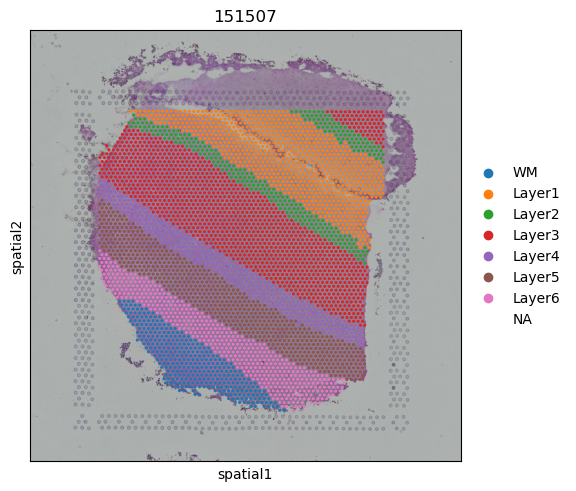

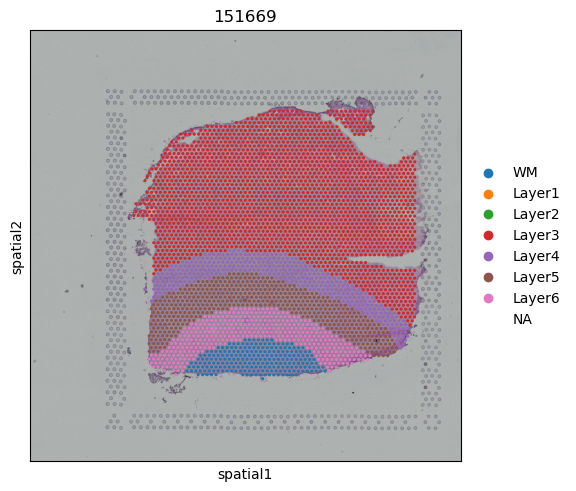

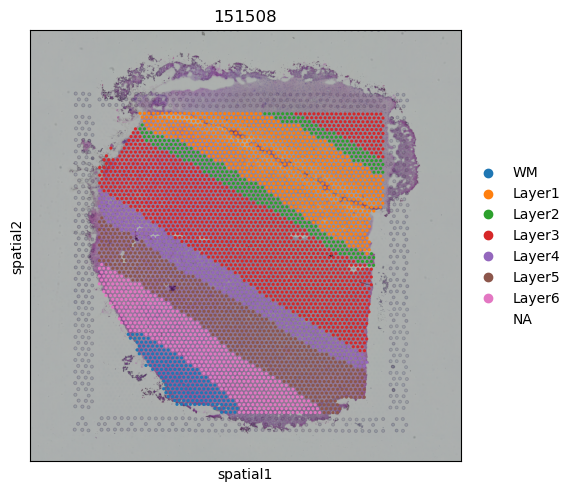

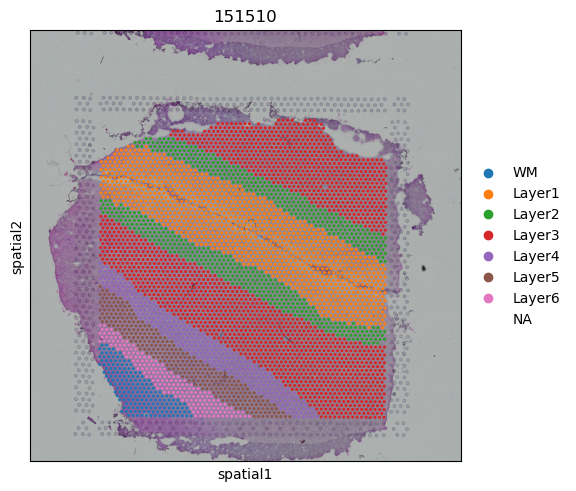

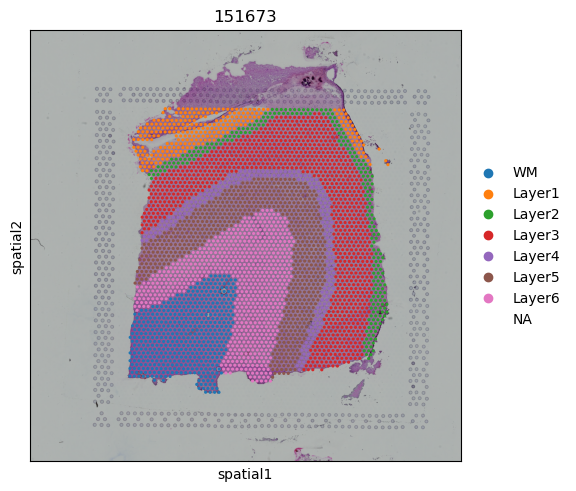

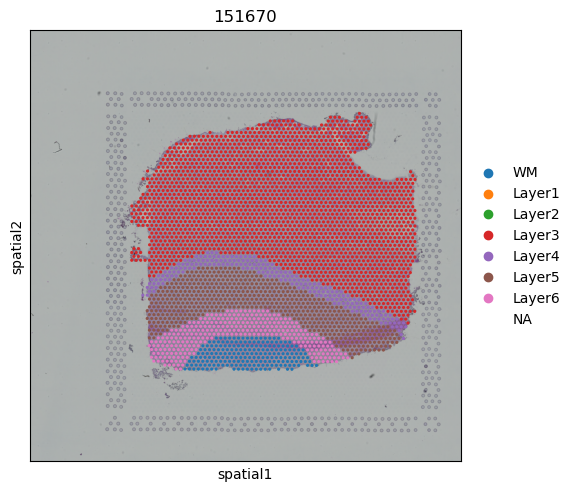

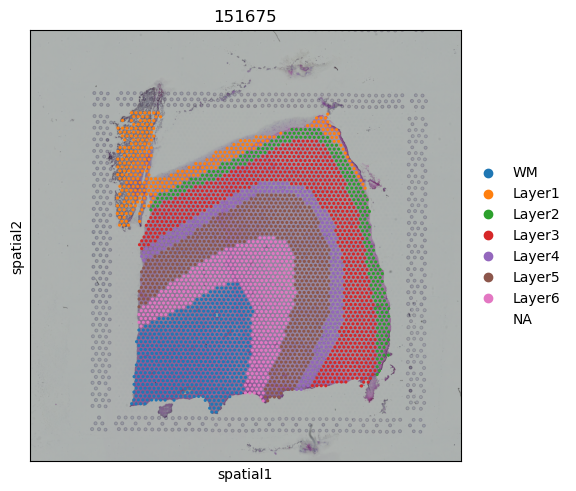

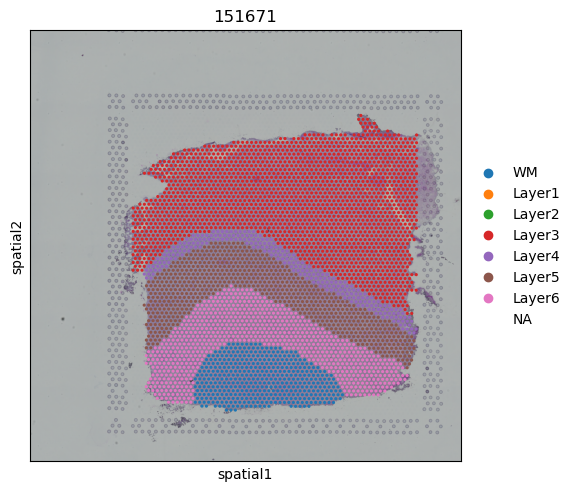

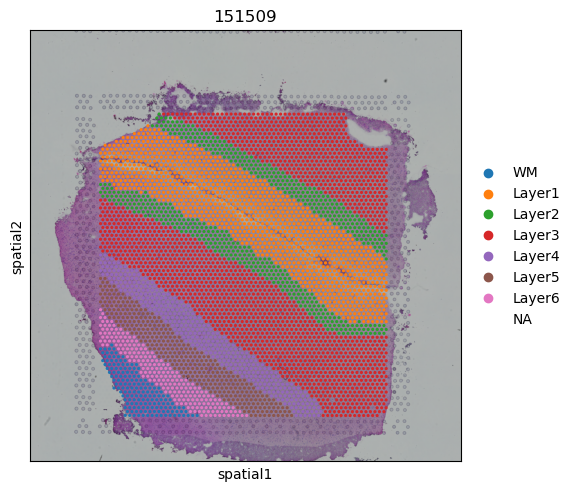

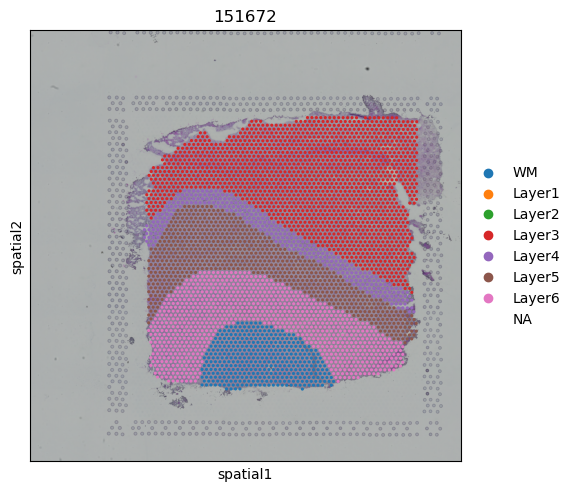

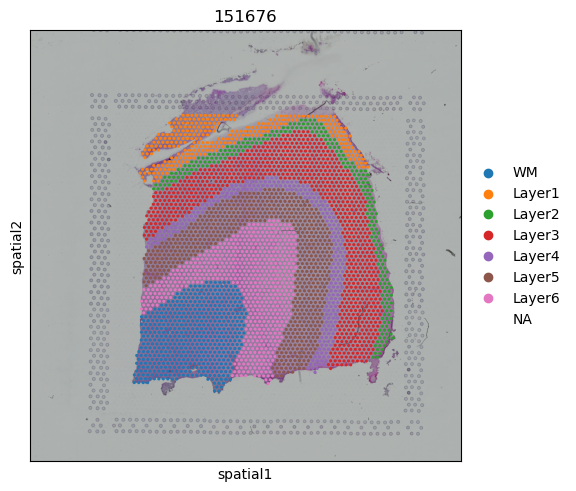

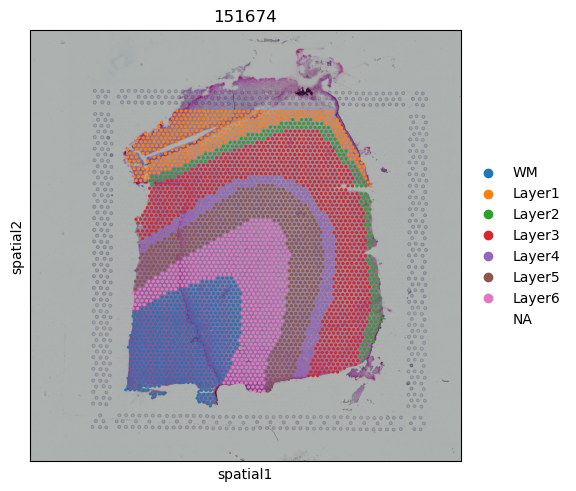

In [33]:
for i in range(len(sample_ids)):
    sq.pl.spatial_scatter(anndata_samples[i], color='layer_guess', title=sample_ids[i])